In [1]:
import pandas as pd
import numpy as np
from features import df_to_features, round_up_rows

from sklearn.preprocessing import StandardScaler
# from lpredictors import MiniXgboostPredictor
# from laughter_prediction.predictors import MiniXgboostPredictor

from sklearn.externals import joblib
import pickle

In [2]:
nrows = 100000
features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv", nrows=nrows)
features_df = round_up_rows(features_df)

# features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv")

In [3]:
mini_df = features_df
nfeatures = mini_df.shape[1] - 2
X = mini_df.iloc[:, :nfeatures].as_matrix()
Y = mini_df.IS_LAUGHTER.as_matrix()
y = Y

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X.shape

(99000, 102)

In [6]:
model_path = "../models/AutoSklearnClassifier_0.5kk_pyAA10.pickle"
model = pickle.load( open(model_path, "rb" ) )
# model = joblib.load(model_path)

In [7]:
model

AutoSklearnClassifier(configuration_mode='SMAC',
           delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_nbest=50,
           ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, include_estimators=None,
           include_preprocessors=None,
           initial_configurations_via_metalearning=25,
           ml_memory_limit=6000, output_folder=None,
           per_run_time_limit=120, resampling_strategy='cv',
           resampling_strategy_arguments={'folds': 5}, seed=42,
           shared_mode=False, time_left_for_this_task=600, tmp_folder=None)

In [8]:
y_pred = model.predict_proba(X)

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_ROC_curve(y_score, y_expected):
    fpr, tpr, thresholds = roc_curve(y_expected, y_score)
    roc_auc = auc(fpr, tpr)
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

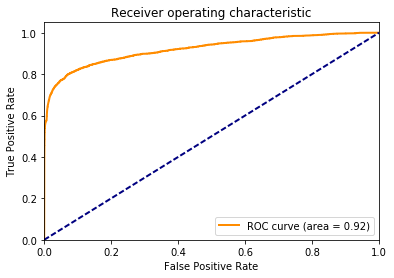

In [10]:
plot_ROC_curve(y_pred[:, 1], y)

In [ ]:
y

In [11]:
# Compute ROC curve and ROC area for each class
# roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

In [12]:
thresholds[tpr >= 0.6][0]

0.19774633005922265

numpy.ndarray